### 数据来源：某企业销售的6种商品所对应的送货及用户反馈数据
### 解决问题：
##### 1、配送服务是否存在问题
##### 2、是否存在尚有潜力的销售区域
##### 3、商品是否存在质量问题

### 先放结论：
##### 1、货品4→西北，货品2→马来西亚两条线路存在较大问题，急需提升时效
##### 2、货品2在华东地区还有较大市场空间，适合加大投入，同时货品2在西北配送时效长，用户拒收率高，从成本角度考虑，应该减少投入
##### 3、货品1、2、4质量存在问题，建议扩大抽检范围，增大质检力度

### 分析过程如下
#### 一、数据清洗
##### ① 重复值、缺失值、格式调整
##### ② 异常值处理（比如：销售金额存在等于0的，数量和销售金额的标准差都在均值的8倍以上等）
#### 二、数据规整
##### 比如：增加一项辅助列：月份
#### 三、数据分析并可视化

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示

## 一、数据清洗
① 重复值、缺失值、格式调整

In [2]:
data = pd.read_csv('data_wuliu.csv',encoding='gbk')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1159 non-null   object 
 1   订单行     1161 non-null   int64  
 2   销售时间    1161 non-null   object 
 3   交货时间    1161 non-null   object 
 4   货品交货状况  1159 non-null   object 
 5   货品      1161 non-null   object 
 6   货品用户反馈  1161 non-null   object 
 7   销售区域    1161 non-null   object 
 8   数量      1157 non-null   float64
 9   销售金额    1161 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 90.8+ KB


#### 通过info()可以看出，包括10列数据，名字，数据量，格式等，可以得出：
#### 1.订单号，货品交货情况，数量：存在缺失值，但是确实量不大，可以删除
#### 2.订单行，对分析无关紧要，可以考虑删除
#### 3.销售金额格式不对（万元|元，逗号问题）,数据类型需要转换成int|float

In [3]:
#删除重复记录
data.drop_duplicates(keep='first',inplace=True)
#删除缺失值（na,删除待有na的整行数据,axis=0,how='any'默认值）
data.dropna(axis=0,how='any',inplace=True)
#删除订单行(重复运行会报错，因为第一次已经删除了订单行这一列)
data.drop(columns=['订单行'],inplace=True,axis=1)
print(data.info())
#更新索引(drop=True:把原来的索引index列删除，重置index)
data.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1146 entries, 0 to 1160
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1146 non-null   object 
 1   销售时间    1146 non-null   object 
 2   交货时间    1146 non-null   object 
 3   货品交货状况  1146 non-null   object 
 4   货品      1146 non-null   object 
 5   货品用户反馈  1146 non-null   object 
 6   销售区域    1146 non-null   object 
 7   数量      1146 non-null   float64
 8   销售金额    1146 non-null   object 
dtypes: float64(1), object(8)
memory usage: 89.5+ KB
None


In [4]:
#取出销售金额列，对每一个数据进行清洗
#编写自定义过滤函数：删除逗号，转成float，如果是万元则*10000，否则，删除元

In [5]:
def data_deal(number):
    if number.find('万元')!= -1:#找到带有万元的，取出数字，去掉逗号，转成float，*10000
        number_new = float(number[:number.find('万元')].replace(',',''))*10000
        pass
    else: #找到带有元的，删除元，删除逗号，转成float
        number_new = float(number.replace('元','').replace(',',''))
        pass
    return number_new
data['销售金额'] = data['销售金额'].map(data_deal)
data

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0


#### ② 异常值处理

In [6]:
print(data.describe())

                 数量          销售金额
count   1146.000000  1.146000e+03
mean      76.069372  1.223488e+05
std      589.416486  1.114599e+06
min        1.000000  0.000000e+00
25%        1.000000  2.941500e+03
50%        1.000000  9.476500e+03
75%        4.000000  3.576775e+04
max    11500.000000  3.270000e+07


#### 1.销售金额为0的情况，删除
#### 2.产生严重的数据左偏情况（电商领域的2/8法则很正常。）

In [7]:
data = data[data['销售金额']!=0]
data

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0


### 二、数据规整

In [8]:
data['销售时间'] = pd.to_datetime(data['销售时间'])
data['月份'] = data['销售时间'].apply(lambda x:x.month)
data

C:\Users\DELL\AppData\Local\Temp\ipykernel_7260\2898025282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['销售时间'] = pd.to_datetime(data['销售时间'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7260\2898025282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['月份'] = data['销售时间'].apply(lambda x:x.month)


,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,月份
0,P096311,2016-07-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0,7
1,P096826,2016-08-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0,8
2,P097435,2016-07-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0,7
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0,11
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0,11
...,...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0,12
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0,12
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0,12
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0,12


### 三、数据分析并可视化
1、配送服务是否存在问题
#### a.月份维度

In [9]:
data['货品交货状况'] = data['货品交货状况'].str.strip()
data1 = data.groupby(['月份','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
data1
#从按时交货率来看，第四季度低于第三季度，猜测可能是气候原因造成

C:\Users\DELL\AppData\Local\Temp\ipykernel_7260\980966726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['货品交货状况'] = data['货品交货状况'].str.strip()


货品交货状况,按时交货,晚交货,按时交货率
月份,,,
7,189,13,0.935644
8,218,35,0.861660
9,122,9,0.931298
10,238,31,0.884758
11,101,25,0.801587
12,146,18,0.890244


#### b.销售区域维度

In [10]:
data1 = data.groupby(['销售区域','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
print(data1.sort_values(by='按时交货率',ascending=False))
#西北地区存在突出的延时交货问题，急需解決

货品交货状况  按时交货  晚交货     按时交货率
销售区域                       
泰国       183    4  0.978610
马来西亚     310   16  0.950920
华南        10    1  0.909091
华北       226   27  0.893281
华东       268   39  0.872964
西北        17   44  0.278689


#### c.货品维度

In [11]:
data1 = data.groupby(['货品','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
print(data1.sort_values(by='按时交货率',ascending=False))
#货品4晚交货情况非常严重，其余货品相对交货

货品交货状况  按时交货  晚交货     按时交货率
货品                         
货品5      183    4  0.978610
货品6      309    7  0.977848
货品1       27    2  0.931034
货品3      212   26  0.890756
货品2      269   48  0.848580
货品4       14   44  0.241379


#### d.货品和销售区域结合

In [12]:
data1 = data.groupby(['货品','销售区域','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
print(data1.sort_values(by='按时交货率',ascending=False))
#销售区域：最差在西北地区，货品有1和4，主要是货品4送过较晚导致
#货品：最差的货品2，主要送往华东和马来西亚，主要是马来西亚的送货较晚导致。

货品交货状况     按时交货   晚交货     按时交货率
货品  销售区域                       
货品5 泰国    183.0   4.0  0.978610
货品6 马来西亚  309.0   7.0  0.977848
货品1 华北     14.0   1.0  0.933333
    华南     10.0   1.0  0.909091
货品3 华北    212.0  26.0  0.890756
货品2 华东    268.0  39.0  0.872964
货品4 西北     14.0  44.0  0.241379
货品2 马来西亚    1.0   9.0  0.100000
货品1 西北      3.0   NaN       NaN


### 2、是否存在尚有潜力的销售区域

#### a.月份维度

<Axes: xlabel='月份'>

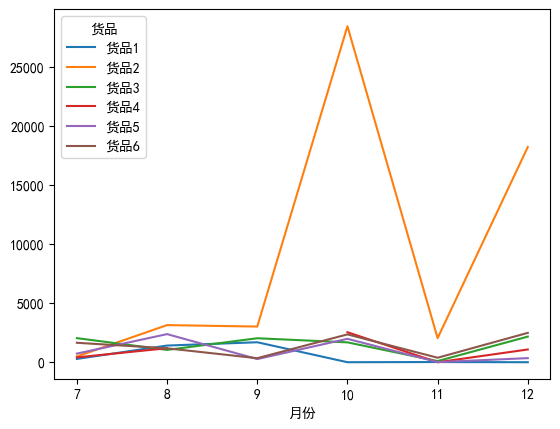

In [13]:
data1 = data.groupby(['月份','货品'])['数量'].sum().unstack()
data1.plot(kind='line')
# 货品2在10月和12月份，销量猛增，原因猜测有二：1.公司加大营销力度  2.开发了新的市场(后续有结论)

#### b.不同区域

In [14]:
data1 = data.groupby(['销售区域','货品'])['数量'].sum().unstack()
data1
# 从销售区域看，每种货品销售区域为1~3个，货品1有三个销售区域，货品2有两个销售区域，其余货品均有1个销售区域

货品,货品1,货品2,货品3,货品4,货品5,货品6
销售区域,,,,,,
华东,NaN,53811.0,NaN,NaN,NaN,NaN
华北,2827.0,NaN,9073.5,NaN,NaN,NaN
华南,579.0,NaN,NaN,NaN,NaN,NaN
泰国,NaN,NaN,NaN,NaN,5733.0,NaN
西北,11.0,NaN,NaN,5229.0,NaN,NaN
马来西亚,NaN,1510.0,NaN,NaN,NaN,8401.0


#### c.月份和区域

In [15]:
data1 = data.groupby(['月份','销售区域','货品'])['数量'].sum().unstack()
data1['货品2']
#货品2在10，12月份销量猛增，原因主要发生在原有销售区域（华东）
#同样，分析出在7，8，9，11月份销售数量还有很大提升空间，可以适当加大营销力度

月份  销售区域
7   华东        489.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        2.0
8   华东       1640.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚     1503.0
9   华东       3019.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        1.0
10  华东      28420.0
    华北          NaN
    泰国          NaN
    西北          NaN
    马来西亚        NaN
11  华东       2041.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        1.0
12  华东      18202.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        3.0
Name: 货品2, dtype: float64

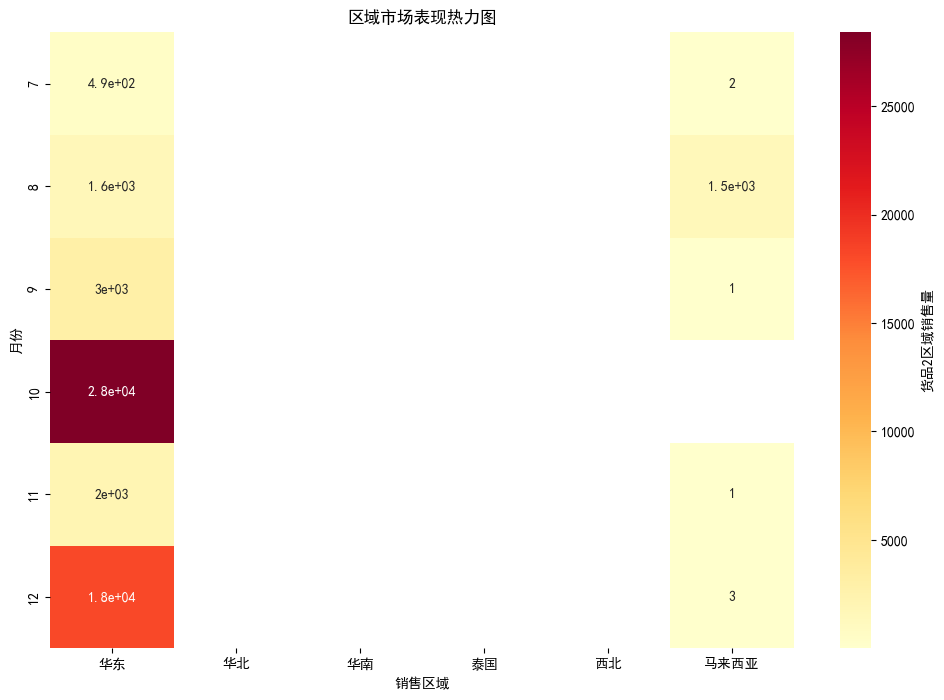

In [22]:
# 生成区域热力图
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(
    data1['货品2'].unstack(),
    annot=True, 
    cmap='YlOrRd',
    cbar_kws={'label': '货品2区域销售量'}
)
plt.title('区域市场表现热力图')
plt.show()

### 3.商品是否存在质量问题

In [26]:
data['货品用户反馈'] = data['货品用户反馈'].str.strip()  #取出首位空格
data1 = data.groupby(['货品','销售区域'])['货品用户反馈'].value_counts().unstack()
# 确保所有反馈类型都存在（如果缺失则填充为0）
feedback_types = ['拒货', '返修', '质量合格']
for feedback in feedback_types:
    if feedback not in data1.columns:
        data1[feedback] = 0
data1['拒货率'] = data1['拒货'] /data1.sum(axis=1)  #按行进行求和汇总
data1['返修率'] = data1['返修'] /data1.sum(axis=1)
data1['合格率'] = data1['质量合格'] /data1.sum(axis=1)
data1.sort_values(['合格率','返修率','拒货率'],ascending=False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7260\1715301819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['货品用户反馈'] = data['货品用户反馈'].str.strip()  #取出首位空格


货品用户反馈      拒货   质量合格    返修       拒货率       返修率       合格率
货品  销售区域                                                 
货品3 华北    31.0  188.0  19.0  0.130252  0.079788  0.789219
货品6 马来西亚  56.0  246.0  14.0  0.177215  0.044279  0.777936
货品5 泰国    14.0  144.0  29.0  0.074866  0.155018  0.769108
货品2 华东    72.0  184.0  51.0  0.234528  0.165997  0.598568
货品1 华南     5.0    4.0   2.0  0.454545  0.174603  0.343963
    西北     NaN    1.0   2.0       NaN  0.666667  0.272727
    华北     NaN    3.0  12.0       NaN  0.800000  0.189873
货品4 西北     NaN    9.0  49.0       NaN  0.844828  0.152945
货品2 马来西亚   6.0    1.0   3.0  0.600000  0.283019  0.091886

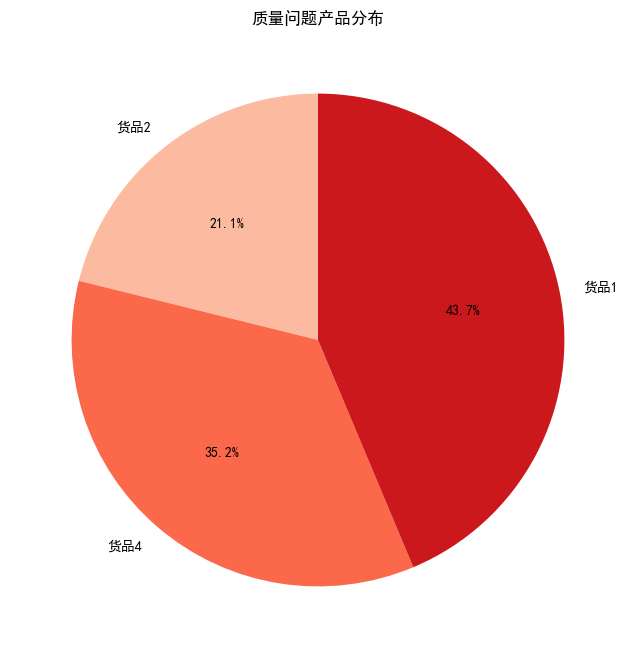

In [30]:
# 质量问题分布饼图（仅展示前3款问题商品）
quality_issues = data1.sort_values('合格率', ascending=True).head(3)

# 确保 '货品' 是列名（如果之前是索引，需要重置索引）
if isinstance(quality_issues.index, pd.MultiIndex):
    quality_issues = quality_issues.reset_index()

# 检查 '货品' 列是否存在
if '货品' not in quality_issues.columns:
    # 如果 '货品' 是多级索引的一部分，提取它
    if len(quality_issues.index.names) > 0 and quality_issues.index.names[0] == '货品':
        quality_issues = quality_issues.reset_index(level='货品')

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(
    quality_issues['合格率'], 
    labels=quality_issues['货品'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Reds', 3)
)
plt.title('质量问题产品分布')
plt.show()

In [80]:
# 货品3.6.5合格率均较高，返修率比较低，说明质量还可以
# 货品1.2.4合格率较低，返修率较高，质量存在一定的问题，需要改善
# 货品2在马拉西亚的拒货率最高，同时，在货品2在马拉西亚的按时交货率也非常低。猜测：马来西亚人对送货的时效性要求较高，
# 如果达不到，则往往考虑拒货。
# 考虑到货品2主要在华东地区销售量大，可以考虑增大在华东的投资，适当较小马来西亚的投入。